## Business Understanding

Churn pelanggan merujuk pada fenomena di mana pelanggan menghentikan hubungan atau langganan mereka dengan perusahaan atau penyedia layanan. Ini mewakili tingkat di mana pelanggan berhenti menggunakan produk atau layanan perusahaan dalam periode tertentu. Churn adalah metrik penting bagi bisnis karena berdampak langsung pada pendapatan, pertumbuhan, dan retensi pelanggan.

Dalam konteks dataset Churn, label churn menunjukkan apakah pelanggan telah churn atau tidak. Pelanggan yang churn adalah orang yang telah memutuskan untuk menghentikan langganan atau penggunaan layanan perusahaan. Di sisi lain, pelanggan yang tidak churn adalah orang yang terus terlibat dan mempertahankan hubungan mereka dengan perusahaan.

Memahami churn pelanggan sangat penting bagi bisnis untuk mengidentifikasi pola, faktor, dan indikator yang berkontribusi terhadap attrition pelanggan. Dengan menganalisis perilaku churn dan fitur-fitur yang terkait, perusahaan dapat mengembangkan strategi untuk mempertahankan pelanggan yang ada, meningkatkan kepuasan pelanggan, dan mengurangi turnover pelanggan. Teknik pemodelan prediktif juga dapat diterapkan untuk meramalkan dan secara proaktif menangani churn potensial, memungkinkan perusahaan untuk mengambil langkah-langkah proaktif untuk mempertahankan pelanggan yang berisiko.

### Problem Statement and Goals

Tujuan dari proyek ini adalah untuk membangun model prediktif yang dapat memprediksi churn pelanggan. Model ini akan membantu perusahaan untuk mengidentifikasi pelanggan yang berisiko churn dan mengambil tindakan proaktif untuk mempertahankan pelanggan tersebut. Dengan demikian, tujuan utama dari proyek ini adalah untuk mengurangi churn pelanggan dan meningkatkan retensi pelanggan.

## Data Understanding

Data yang digunakan pada proyek kali ini adalah data yang diambil dari <a href='https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality'>Kaggle</a>. Trainning file untuk dataset CHURN berisi kumpulan 440882 record pelanggan beserta fitur dan label churn mereka masing-masing. File ini berfungsi sebagai sumber utama untuk melatih model machine learning untuk memprediksi churn pelanggan. Setiap record dalam file training mewakili pelanggan dan mencakup fitur seperti CustomerID,	Age	Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, dan	Last Interaction. Label churn menunjukkan apakah pelanggan telah churn (1) atau tidak (0). Dengan memanfaatkan file pelatihan ini, bisnis dapat mengembangkan model prediksi churn yang akurat untuk mengidentifikasi pelanggan yang paling mungkin untuk churn dan mengambil tindakan proaktif untuk mempertahankannya.

### Data Loading

Import library yang dibutuhkan dan load dataset yang akan digunakan.

In [243]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Kemudian mengimport data dengan pandas lalu menampilkan data untuk melihat struktur data dan tipe data yang ada.

In [244]:
df_churn = pd.read_csv('data\customer_churn_dataset-training-master.csv')
df_churn
df_churn

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


Dari output code di atas memberikan informasi sebagai berikut:
- Data terdiri dari 440883 baris dan 12 kolom
- Terdapat 11 kolom fitur yaitu CustomerID,	Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, dan Last Interaction.
- Terdapat 1 kolom target yaitu Churn

## Exploratory Data Analysis

### Mengecek Tipe Data Variabel

In [245]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


### Mengecek Missing Value

In [246]:
df_churn.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

### Mengecek Duplikasi Data

In [247]:
df_churn.duplicated().sum()

0

### Mengecek Statistik Data

In [248]:
df_churn.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### Menangani Missing Value

In [249]:
df_churn.dropna(inplace=True)
df_churn.reset_index(drop=True, inplace=True)

## Korelasi Fitur

<Axes: >

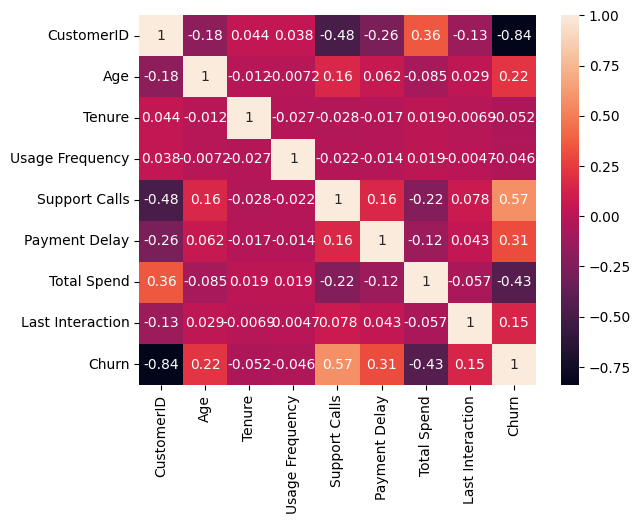

In [250]:
sns.heatmap(data=df_churn.select_dtypes(include=[np.number]).corr(),annot=True)

## Data Preparation

### Drop Unnecessary Columns

In [251]:
df_churn.drop(columns=['CustomerID','Last Interaction','Tenure','Usage Frequency'],inplace=True)

### Encoding Categorical Data

In [252]:
encoder = LabelEncoder()
df_churn['Gender'] = encoder.fit_transform(df_churn['Gender'])
df_churn.head(5)

,Age,Gender,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Churn
0,30.0,0,5.0,18.0,Standard,Annual,932.0,1.0
1,65.0,0,10.0,8.0,Basic,Monthly,557.0,1.0
2,55.0,0,6.0,18.0,Basic,Quarterly,185.0,1.0
3,58.0,1,7.0,7.0,Standard,Monthly,396.0,1.0
4,23.0,1,5.0,8.0,Basic,Monthly,617.0,1.0


In [253]:
encoder = OneHotEncoder(sparse=False)
columns_to_encode = ['Subscription Type','Contract Length']
encoded_df = pd.DataFrame(encoder.fit_transform(df_churn[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode))
df_churn.drop(columns_to_encode, axis=1, inplace=True)
df_churn = pd.concat([df_churn, encoded_df], axis=1)
df_churn

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Gender,Support Calls,Payment Delay,Total Spend,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,5.0,18.0,932.00,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65.0,0,10.0,8.0,557.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55.0,0,6.0,18.0,185.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58.0,1,7.0,7.0,396.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23.0,1,5.0,8.0,617.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440827,42.0,1,1.0,3.0,716.38,0.0,0.0,1.0,0.0,1.0,0.0,0.0
440828,25.0,0,1.0,20.0,745.38,0.0,0.0,1.0,0.0,1.0,0.0,0.0
440829,26.0,1,1.0,5.0,977.31,0.0,0.0,0.0,1.0,0.0,0.0,1.0
440830,28.0,1,2.0,0.0,602.55,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Train-Test Split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(df_churn.drop(columns=['Churn']), df_churn['Churn'], test_size = 0.1, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((396748, 11), (44084, 11), (396748,), (44084,))

## Model Development

In [255]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, verbose=2, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
1550/1550 - 6s - loss: 0.3175 - accuracy: 0.8835 - val_loss: 0.2002 - val_accuracy: 0.9200 - 6s/epoch - 4ms/step
Epoch 2/10
1550/1550 - 6s - loss: 0.1931 - accuracy: 0.9253 - val_loss: 0.1670 - val_accuracy: 0.9384 - 6s/epoch - 4ms/step
Epoch 3/10
1550/1550 - 5s - loss: 0.1677 - accuracy: 0.9373 - val_loss: 0.1504 - val_accuracy: 0.9431 - 5s/epoch - 3ms/step
Epoch 4/10
1550/1550 - 5s - loss: 0.1560 - accuracy: 0.9430 - val_loss: 0.1389 - val_accuracy: 0.9491 - 5s/epoch - 3ms/step
Epoch 5/10
1550/1550 - 4s - loss: 0.1491 - accuracy: 0.9467 - val_loss: 0.1534 - val_accuracy: 0.9436 - 4s/epoch - 3ms/step
Epoch 6/10
1550/1550 - 5s - loss: 0.1409 - accuracy: 0.9507 - val_loss: 0.1337 - val_accuracy: 0.9534 - 5s/epoch - 3ms/step
Epoch 7/10
1550/1550 - 5s - loss: 0.1386 - accuracy: 0.9524 - val_loss: 0.1305 - val_accuracy: 0.9555 - 5s/epoch - 3ms/step
Epoch 8/10
1550/1550 - 4s - loss: 0.1346 - accuracy: 0.9543 - val_loss: 0.1724 - val_accuracy: 0.9356 - 4s/epoch - 3ms/step
Epoch 9/

## Evaluasi Model

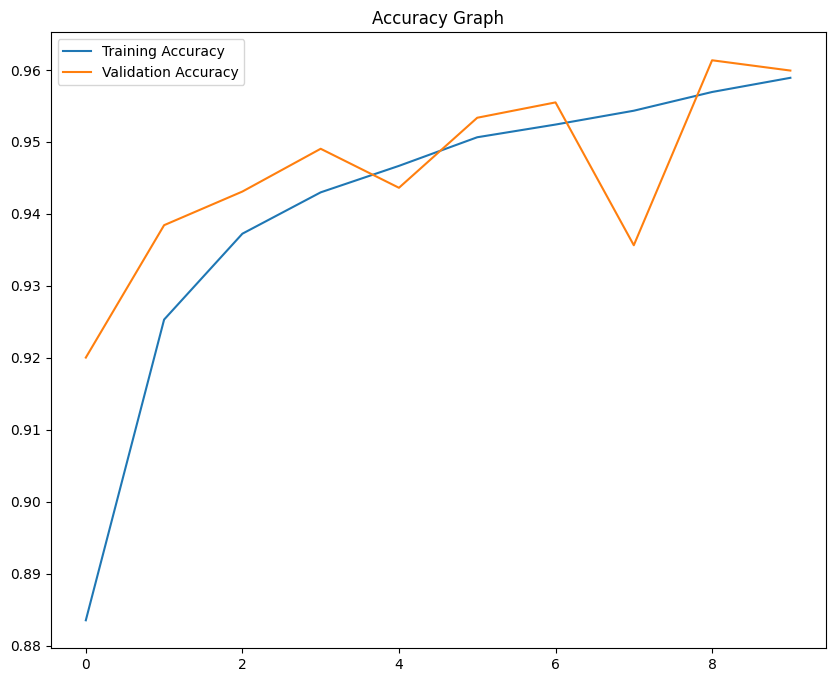

In [256]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Graph')
plt.show()